In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('groupe1.csv')
df.head()

,Unnamed: 0,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,...,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,header,video_ids,videos
0,0,1330025067400553,لكل من يسأل عن حمية اللوكارب LowCarb Diet 🥑🫒🍓🍖...,لكل من يسأل عن حمية اللوكارب LowCarb Diet 🥑🫒🍓🍖...,NaN,NaN,2021-08-31 10:51:53,1630403513,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t39.3...,...,47,[{'name': 'Diabète Maroc - régime Low Carb - ا...,1191348251268236,NaN,3.007771e+15,['3007770982772985'],False,Ayman Iguerhzifen‏Diabète Maroc - régime Low C...,NaN,NaN
1,1,1669619220107801,لا للحرمان مرضى السكري,لا للحرمان مرضى السكري,NaN,NaN,2022-12-29 16:26:35,1672327595,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t15.5...,...,1,"[{'name': 'Zanouba Diabete', 'link': '/zanouba...",1191348251268236,NaN,NaN,[],False,تمت مشاركة ‏منشور‏ بواسطة ‏‎Zanouba Diabete‎‏.,NaN,NaN
2,2,1669102223492834,السلام عليكم الله يخليكم بغيت نعرف واش كاين شي...,السلام عليكم الله يخليكم بغيت نعرف واش كاين شي...,NaN,NaN,2022-12-29 00:09:56,1672268996,NaN,https://scontent.frba5-1.fna.fbcdn.net/m1/v/t6...,...,2,[{'name': 'Diabète Maroc - régime Low Carb - ا...,1191348251268236,NaN,NaN,[],False,بالتحدي حققي احلامك‏Diabète Maroc - régime Low...,NaN,NaN
3,3,1668398646896525,سلام أعضاء المجموعة عندي سؤال عفاكم بنتي ولات ...,سلام أعضاء المجموعة عندي سؤال عفاكم بنتي ولات ...,NaN,NaN,2022-12-28 01:45:29,1672188329,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t1.30...,...,7,NaN,1191348251268236,NaN,NaN,[],False,NaN,NaN,NaN
4,4,1665682760501447,السلام عليكم بغيت نسول النساء الحوامل واش كتست...,السلام عليكم بغيت نسول النساء الحوامل واش كتست...,NaN,NaN,2022-12-24 14:43:18,1671889398,NaN,https://scontent.frba5-1.fna.fbcdn.net/v/t1.30...,...,5,NaN,1191348251268236,NaN,NaN,[],False,NaN,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'post_id', 'text', 'post_text', 'shared_text',
       'original_text', 'time', 'timestamp', 'image', 'image_lowquality',
       'images', 'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'header', 'video_ids', 'videos'],
      dtype='object')

<AxesSubplot:>

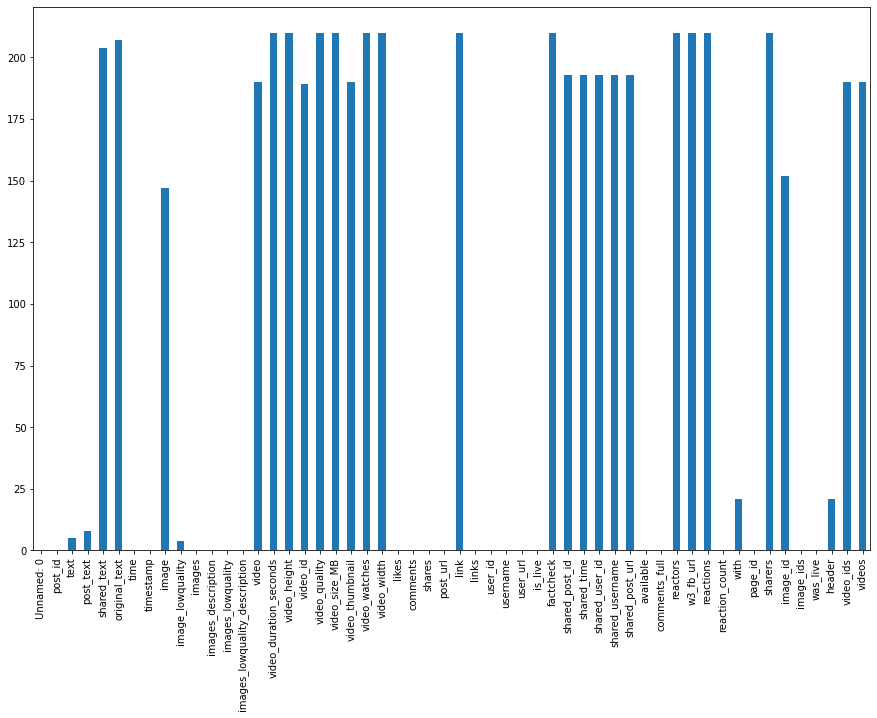

In [13]:
import matplotlib.pyplot as plt

df.isna().sum().plot(kind='bar',figsize=(15,10))

In [74]:
df['comments_full'][2][0]

'['

In [76]:
for a in range(len(eval(df['comments_full'][2]))):
    print(eval(df['comments_full'][2])[a]['commenter_id'])

100045389040363
100002028835739


In [69]:
len(eval(df['comments_full'][5]))

12

In [7]:
import datetime
len(eval(df['comments_full'][0]))

19

In [70]:
k=0
for i in range(len(df)):
    k+=len(eval(df['comments_full'][i]))

print(k)

1875


In [72]:
df['post_id'][0]

1330025067400553

In [77]:
df['user_id']

0       100006203372529
1       100003001016830
2       100024964941069
3       610161740001467
4      3064682877186801
             ...       
205     100002028835739
206     100007802683310
207     100023134779134
208     624958515184338
209     100033318224997
Name: user_id, Length: 210, dtype: int64

### Comments network

In [8]:
commenters_id = []
user_post = []

for i in range(len(df)):
    for a in range(len(eval(df['comments_full'][i]))):
        commenters_id.append(eval(df['comments_full'][i])[a]['commenter_id'])
        user_post.append(df['user_id'][i])

print(len(commenters_id),'********',len(user_post))

1875 ******** 1875


In [9]:
df_comments = pd.DataFrame(data={'commenters_id':commenters_id,'user_post':user_post})

In [10]:
df_comments.head(8)

,commenters_id,user_post
0,100003514921975,100006203372529
1,704350801,100006203372529
2,100048010651681,100006203372529
3,100004315212633,100006203372529
4,100006203372529,100006203372529
5,100006203372529,100006203372529
6,100006203372529,100006203372529
7,100004315212633,100006203372529


In [11]:
import networkx as nx

# Create commG_comments network from edgelist
G_comments = nx.from_pandas_edgelist(
    df_comments,
    source = 'commenters_id',
    target = 'user_post',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in comments network:', len(G_comments.nodes()))

# Print the number of edges
print('Edges in comments network:', len(G_comments.edges()))

Nodes in comments network: 591
Edges in comments network: 1162


NameError: name 'plt' is not defined

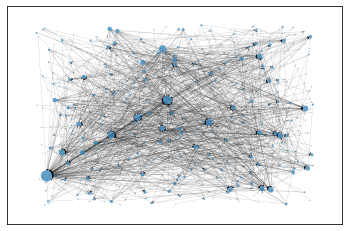

In [12]:
pos = nx.random_layout(G_comments)

# Create size list
sizes = [x[1] for x in G_comments.degree()]

# Draw the network
nx.draw_networkx(G_comments, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

In [4]:
from pyvis.network import Network

In [15]:
G = Network()

G.from_nx(G_comments)
G.show_buttons(filter_=["physics"])
G.show("G_comments_map.html")

### Who are the elites of the community ?

***Centrality***

Centrality is a measure of importance of a node to a network. There are many different types of centrality and each of them has slightly different meaning in Facebook networks. We are first focusing on degree centrality, since its calculation is straightforward and has an intuitive explanation.

For directed networks like Facebook, we need to be careful to distinguish between in-degree and out-degree centrality, especially in comments networks. In-degree centrality for comments networks signals users who are getting many comments.

In [16]:
# Generate in-degree centrality for replies 
comments_centrality = nx.in_degree_centrality(G_comments)

In [18]:
# Store centralities in DataFrame
reply = pd.DataFrame(list(comments_centrality.items()), columns = ['user_id','degree_centrality'])
print(reply.sort_values('degree_centrality', ascending = False).head(10))

             user_id  degree_centrality
151  100002028835739           0.216949
94   100008703273829           0.128814
236  100003638323157           0.079661
333  100006424010192           0.072881
61   100072155637215           0.069492
96   100069016158093           0.062712
399  100082864043624           0.054237
134  100022643686482           0.054237
235  100003001016830           0.052542
182  100011778878449           0.047458


There are the 10 elites of the community, which there post's know the most activities in the community, but those elites are adults ? doctor's or specialist's ? Is the content between them useful or does it contain medical fallacies ?

Answernig these questions will give us a picture of the awareness of Moroccan diabetics and the exent to which social network affects their health.

After checking those profile's we found that the first one is the admin of the communty and it's an employer at an organization of medical product's.
All those member's are adult's and no one is doctor, just diabitcs changing advices between them, sharing the experience to save other's and some nutritional recipes to help them ovecome the disease.(swel mjreb omatswel tbib hhh)

Also an imoportant profile that take my attention is a profile with the user id : '100088588099681' that join the group recently, after checking we found that it's a data scraper that join just for espionage, so i will descuss with mark to make some penalties for them !!